# Resposta Em Frequência


## Decibel

O decibel é uma medida de ganho em escala logarítmica. Em um sistema com entrada $V_i$ e saída $V_o$,, a potência de entrada $P_i$ é proporcional ao quadrado da tensão de entrada, assim como a potência de saída $P_o$ é proporcional ao quadrado da tensão de saída. O ganho de potência é definido como 

$$G=\frac{P_o}{P_i}$$

e o ganho em decibéis é

$$G(dB)=10 \log\frac{P_o}{P_i}$$

O Ganho em tensão é definido como

$$G_{V}(dB)=20\log \frac{V_o}{V_i}$$


## Diagramas de Bode

Diagramas de Bode são gráficos de ganho e fase em função da frequência, em escala logarítmica. O ganho é dado em decibéis

$$G_V(dB)=20\log \|H(j\omega)\|$$

enquanto o gráfico de fase mostra a variação do ângulo em graus ou radianos, segundo a frequência. 

**Exemplo** neste primeiro exemplo analisamos a resposta em frequência de um filtro $RC$ passa baixas de primeira ordem incluindo os diagramas de Bode:

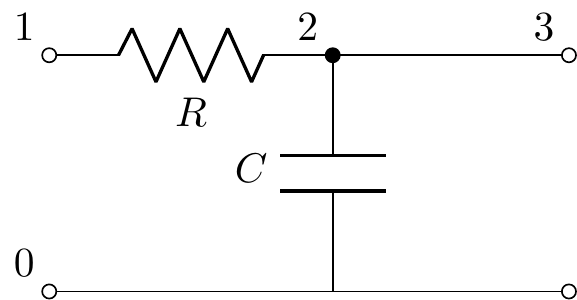

In [1]:
from lcapy import *
a=Circuit("""
P1 1 0; down 
R 1 2 ; right=1.2
C 2 0_2 ; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down""")
a.draw()

In [2]:
H = a.transfer(1, 0, 3, 0)
H

    1    
─────────
C⋅R⋅s + 1

In [3]:
Hw=H(jomega)
Hw

     1     
───────────
ⅉ⋅C⋅R⋅ω + 1

$\tau=RC$. Vamos analisar a resposta em frequência.

In [4]:
Hm=abs(Hw)
Hm

        1        
─────────────────
   ______________
  ╱  2  2  2     
╲╱  C ⋅R ⋅ω  + 1 

Substituindo $R=2\;\Omega$ e $C= \frac{1}{4}$ farads, podemos fazer o gráfico dos diagramas de Bode de módulo e fase da função de transferência.

In [5]:
Hr=H.subs({'R':2,'C':0.25}).simplify()
Hr

  2  
─────
s + 2

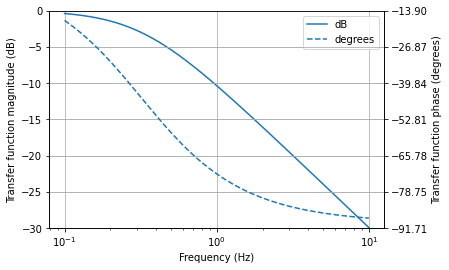

In [6]:
Hr(f).bode_plot((0, 10), plot_type='dB-degrees');

In [7]:
Hm.subs({'R':2,'C':0.25,'omega':2}).simplify()

√2
──
2 

Um filtro composto de elementos passivos não contém elementos amplificadores e não tem ganho de sinal. Assim  o módulo da máxima resposta em frequência é 1, que em decibéis corresponde a 0 $dB$.
Em $\omega=2\;\frac{rad}{s}$, ou $f\approx 0.32\; Hz$, $|H(j\omega)|=\frac{1}{\sqrt{2}}$ e portanto o ganho em potência do filtro é $\frac{1}{2}$, ou seja, a potência de saída é a metade da potência de entrada. Por este motivo, esta frequência é denominada como frequência de corte $\omega_c$, ou $f_c$. Além disso, a frequência de corte corresponde ao polo da função de transferência. A faixa de frequências inferiores a frequência de corte é a banda passante do filtro. O ganho em decibéis na frequëncia de corte é $20\log\frac{1}{2}=-3dB$.

Foi mostrado acima (out[4]) que o módulo da resposta em frequência é 
$$\|H(j\omega)\|=\frac{1}{\sqrt{1+\omega^2R^2C^2}}$$ 

e portanto

$$\omega_c=\frac{1}{RC}=\frac{1}{\tau}$$

e a resposta em frequência pode ser escrita como

$$H(j\omega)=\frac{1}{1+j\frac{\omega}{\omega_c}}$$

Quando $\omega=\omega_c$, 

Além disso, para uma frequência $\omega=10\omega_c=\frac{10}{RC}$ o ganho em decibéis será

$$20\log\|\frac{1}{1+j10}\|=-20\log \|1+j10\|\approx -20log(10)=-20 dB$$

O filtro de primeira ordem (na verdade, isso vale para todo polo de primeira ordem) apresenta uma atenuação de aproximadamente 20 dB por década, como pode ser visto no diagrama acima. Analogamente, a variação de fase do filtro (correspondente aquela de um polo de primeira ordem) é

$$\angle H(j\omega)=\arctan\frac{0}{1}-\arctan\frac{10}{1}=-84.29^0\approx 90^o $$

o polo de primeira ordem causará um atraso de fase de aproximadamente $90^o$ por década.

**Exemplo** Filtro $RC$ passa-baixas de segunda ordem. O circuito utiliza dois estágios $RC$ em cascata, para formar um sistema com polos de segunda ordem com uma atenuação mais rápida que o filtro do exemplo anterior. 

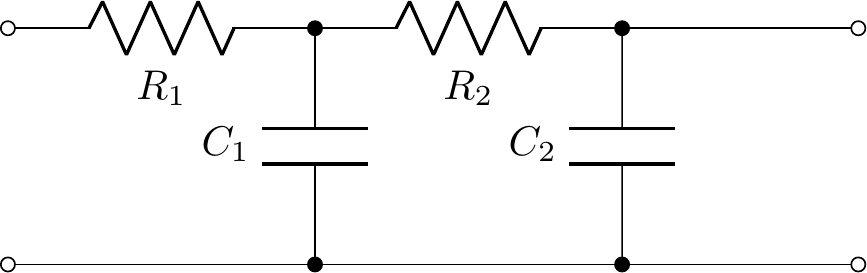

In [8]:
from lcapy import *

a=Circuit("""
P1 1 0; down
R1 1 2 ; right=1.3
C1 2 0a ; down
R2 2 3 ; right=1.3
C2 3 0b ; down
W 0 0a; right=1.3
W 0a 0b; right=1.3
W 3 3a; right
W 0b 0c; 
P2 3a 0c; down
; draw_nodes=connections, label_nodes=none""")
a.draw()

In [9]:
H=a.transfer('P1','P2')
H.canonical()

               ⎛     1     ⎞                
               ⎜───────────⎟                
               ⎝C₁⋅C₂⋅R₁⋅R₂⎠                
────────────────────────────────────────────
 2   s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂)        1     
s  + ───────────────────────── + ───────────
            C₁⋅C₂⋅R₁⋅R₂          C₁⋅C₂⋅R₁⋅R₂

In [10]:
Hv = H.subs({'R1':10e3, 'C1':100e-9, 'R2':10e3, 'C2':1e-9})

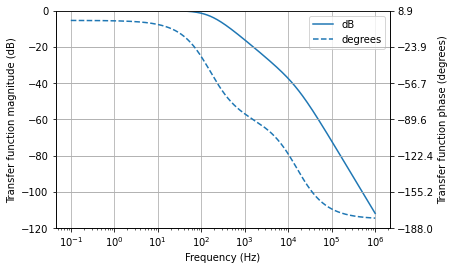

In [11]:
Hv(f).bode_plot((0, 1e6), plot_type='dB-degrees');

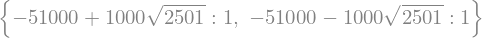

In [12]:
Hv.poles()

O par de polos corresponde às duas frequências de corte, $f_{c1}=157.6 $ Hz e $f_{c2}=16.1$ kHz. Estas frequências podem ser percebidas no diagrama acima, onde o amortecimento do filtro tem inclinação de -20 dB por década a partir de $f_{c1}$, e -40 dB por década a partir de $f_{c2}$. Para que o amortecimento com inclinação de -40 dB ocorra após a primeira frequência de corte, precisamos aproximar os dois polos de forma a aproximarmos um polo de segunda ordem no denominador da função de transferência. Isso pode ser feito com o aumento da capacitância de $C_2$ para 1050nF, por exemplo:

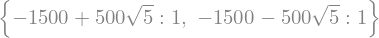

In [13]:
Hv2 = H.subs({'R1':10e3, 'C1':100e-9, 'R2':10e3, 'C2':100e-9})
Hv2.poles()

Os polos correspondem as frequências de 61 Hz e 417 Hz, suficientemente próximas para que o diagrama de Bode mostre uma curva suave com inclinação de aproximadamente 40 dB por década a partir da frequência de corte.

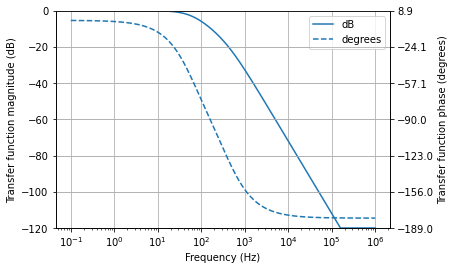

In [14]:
Hv2(f).bode_plot((0, 1e6), plot_type='dB-degrees');

Para analisar o diagrama acima, vamos recordar a função de transferência geral do sistema de segunda ordem

$$ H(s)=\frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$

e comparar com a função de transferência do filtro $RC$ de segunda ordem

$$H(s)=\frac{\frac{1}{C_1C_2R_1R_2}}{s^2+\frac{(C_1R_1+C_2R_1+C_2R_2)}{C_1C_2R_1R_2}s+\frac{1}{C_1C_2R_1R_2}}$$

Desta forma, obtemos $K=1\;\mbox{e}\;\omega_n=\frac{1}{\sqrt{C_1C_2R_1R_2}}$. O filtro tem ganho máximo igual a 1, como pode ser visto no diagrama de Bode em baixas frequências. Novamente, para a determinação da resposta em frequência podemos analisar a expressâo geral

$$H(s)=\frac{\omega_n^2}{\omega_n^2(\frac{1}{\omega_n^2}s^2+\frac{2\zeta}{\omega_n}s+1}=\frac{1}{\frac{1}{\omega_n^2}s^2+\frac{2\zeta}{\omega_n}s+1}$$

Desta forma, substituindo $s=j\omega$,o ganho em decibéis é dado por

$$G_V(dB)=20\log(1)-20\log\|\frac{(j\omega)^2}{\omega_n^2}+\frac{2\zeta}{\omega_n}j\omega+1\|$$

Para $\omega=10\omega_n$, o ganho é aproximadamente dado por

$$20\log\|H(j\omega)\|\approx-20\log\|\frac{(j\omega)^2}{\omega_n^2}\|=-20\log\left(\frac{10\omega_n}{\omega_n}\right)^2=-40\;\mbox{dB}$$

e a fase é

$$\angle(H(j\omega))=-\arctan(\frac{2\zeta\frac{\omega}{\omega_n}}{1-(\frac{\omega}{\omega_n})^2})$$

E para $\omega=10\omega_n$, aproximando como $\omega \gg \omega_n$,

$$\angle(H(j\omega)) \approx -180^o.$$

Concluimos que o filtro de segunda ordem tem um amortecimento com inclinação de -40 dB por década, além de apresentar um atraso de fase de $180^o$ por década. Esses resultados podem ser confirmados no diagrama de Bode mostrado acima. A frequência de corte é  $\omega_c=\omega_n=\frac{1}{\sqrt{R_1R_2C_1C_2}}$. Substituindo os valores do último exemplo resulta em aproximadamente 160 Hz.

**Exemplo** neste último exemplo, vamos estudar o diagrama de Bode para um sistema representado pela função de transferência

$$H(s)=\frac{100}{s^2+2s+100}$$

In [15]:
H=tf(100,[1,2,100])
H

     100      
──────────────
 2            
s  + 2⋅s + 100

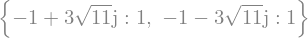

In [16]:
H.poles()

os polos são complexos, o que significa que o sistema é subamortecido e $\zeta < 1$. Comparando o denominador de $H(s)$ com o de um sistema de segunda ordem padrão,

$$s^2+2s+100=s^2+2\zeta\omega_n+\omega_n^2$$

Vemos que $\omega_n=10$ e $\zeta=0,1$. 

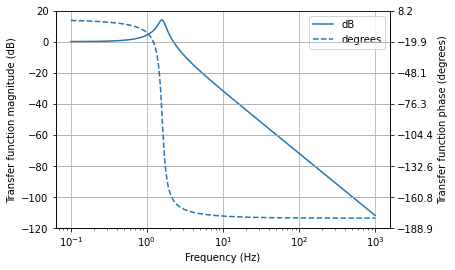

In [17]:
H(f).bode_plot((0, 1e3), plot_type='dB-degrees');

Aumentando o valor de $\zeta$, por exemplo, $\zeta=1$,

In [18]:
H=tf(100,[1,20,100])
H.poles()

São dois polos iguais e o sistema é criticamente amortecido.

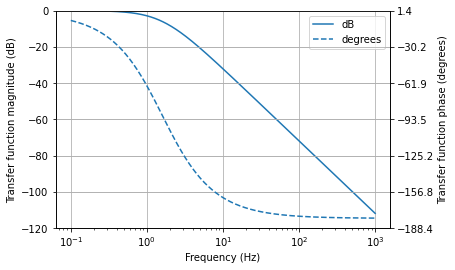

In [19]:
H(f).bode_plot((0, 1e3), plot_type='dB-degrees');

Quando os polos são complexos, $\zeta<1$, o módulo da resposta em frequência mostra oscilação em torno da frequência $\omega_n$ e o atraso de fase é abrupto. Para valores maiores de $\zeta$ as curvas são mais suaves.